<h4><strong>Реализация методов одномерного поиска с точностью 0,001 для 6 варианта exp(x), x ∊ [0,100]</strong> </h4>

<b>Аналитическое решение:</b> <br>Очевидно, что минимальное значение функция exp(x) примет при x=0 и будет равна 1.

In [38]:
import numpy as np
import time
import pandas as pd
import math
from matplotlib import pyplot as plt

<b>Численные методы решения задачи</b>


In [39]:
def f(x):
    return np.exp(x)

min_f_list = []
min_x_list = []
iterations_list = []
exec_time_list = []

<b>Метод половинного деления</b>


Таблица результатов:
Итерация	Начало		Конец		Длина интервала		Отношение
1		0.000000	50.000000	50.000000		N/A
2		0.000000	25.000000	25.000000		0.5
3		0.000000	12.500000	12.500000		0.5
4		0.000000	6.250000	6.250000		0.5
5		0.000000	3.125000	3.125000		0.5
6		0.000000	1.562500	1.562500		0.5
7		0.000000	0.781250	0.781250		0.5
8		0.000000	0.390625	0.390625		0.5
9		0.000000	0.195312	0.195312		0.5
10		0.000000	0.097656	0.097656		0.5
11		0.000000	0.048828	0.048828		0.5
12		0.000000	0.024414	0.024414		0.5
13		0.000000	0.012207	0.012207		0.5
14		0.000000	0.006104	0.006104		0.5
15		0.000000	0.003052	0.003052		0.5
16		0.000000	0.001526	0.001526		0.5
17		0.000000	0.000763	0.000763		0.5

Метод половинного деления: Минимальное значение функции - 1.0, значение x - 0, число итераций - 17, время выполнения - 0.0 секунд


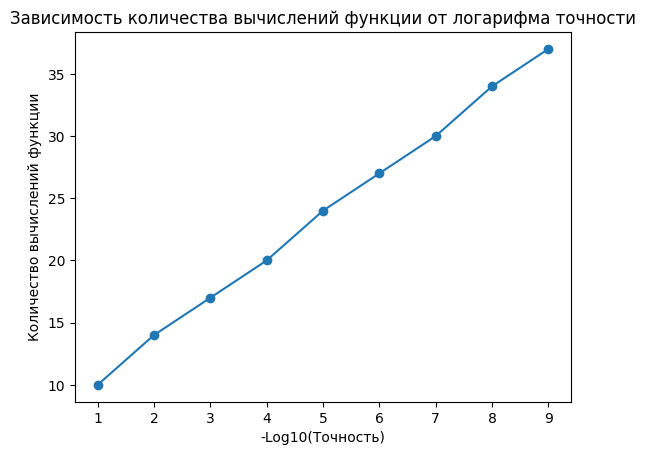

In [41]:
def find_min_half_interval(start, end, tol):
    iterations = 0
    data = []  
    prev_interval_length = float('inf')  
    while end - start > tol:
        iterations += 1
        mid = (start + end) / 2
        if f(mid) > f(start):
            end = mid
        else:
            start = mid

        interval_length = end - start
        ratio = interval_length / prev_interval_length if iterations > 1 else None
        
        data.append([iterations, start, end, interval_length, ratio])
    
        prev_interval_length = interval_length

    return start, f(start), iterations, data

tolerance = float(input("Введите точность: "))

start_time = time.time()

result = find_min_half_interval(0, 100, tolerance)

end_time = time.time()
exec_time = end_time - start_time

if isinstance(result, tuple):
    min_x, min_f, iterations, table_data = result

    print("\nТаблица результатов:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")
    for row in table_data:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4] if row[4] is not None else 'N/A'}")

    print(f"\nМетод половинного деления: Минимальное значение функции - {min_f}, значение x - {min_x}, число итераций - {iterations}, время выполнения - {exec_time} секунд")
    min_f_list.append(min_f)
    min_x_list.append(min_x)
    iterations_list.append(iterations)
    exec_time_list.append(exec_time)

    tolerances = [10**(-i) for i in range(1, 10)]
    iterations_list1 = [find_min_half_interval(0, 100, tol)[2] for tol in tolerances]

    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list1, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()
else:
    iterations = result
    print(f"\nМетод половинного деления: Точность - {tolerance}, число итераций - {iterations}, время выполнения - {end_time - start_time:.6f} секунд")


<b>Метод золотого сечения</b>

In [42]:
def find_min_golden_section(start, end, tol):
    iterations = 0
    while end - start > tol:
        iterations += 1
        mid1 = start + (end - start) * 0.382
        mid2 = start + (end - start) * 0.618
        if f(mid1) > f(mid2):
            start = mid1
        else:
            end = mid2
    return start, f(start), iterations

start_time = time.time()
min_x, min_f, iterations = find_min_golden_section(0, 100, 0.001)
end_time = time.time()
exec_time = end_time - start_time
print(f"Метод золотого сечения: Минимальное значение функции - {min_f}, значение x - {min_x}, число итераций - {iterations}, время выполнения - {exec_time} секунд")
min_f_list.append(min_f)
min_x_list.append(min_x)
iterations_list.append(iterations)
exec_time_list.append(exec_time)

Метод золотого сечения: Минимальное значение функции - 1.0, значение x - 0, число итераций - 24, время выполнения - 0.0 секунд



Таблица результатов для метода золотого сечения:
Итерация	Начало		Конец		Длина интервала		Отношение
1		0.000000	61.800000	61.800000		1.0
2		0.000000	38.192400	38.192400		1.0
3		0.000000	23.602903	23.602903		1.0
4		0.000000	14.586594	14.586594		1.0
5		0.000000	9.014515	9.014515		1.0
6		0.000000	5.570970	5.570970		1.0
7		0.000000	3.442860	3.442860		1.0
8		0.000000	2.127687	2.127687		1.0
9		0.000000	1.314911	1.314911		1.0
10		0.000000	0.812615	0.812615		1.0
11		0.000000	0.502196	0.502196		1.0
12		0.000000	0.310357	0.310357		1.0
13		0.000000	0.191801	0.191801		1.0
14		0.000000	0.118533	0.118533		1.0
15		0.000000	0.073253	0.073253		1.0
16		0.000000	0.045271	0.045271		1.0
17		0.000000	0.027977	0.027977		1.0
18		0.000000	0.017290	0.017290		1.0
19		0.000000	0.010685	0.010685		1.0
20		0.000000	0.006603	0.006603		1.0
21		0.000000	0.004081	0.004081		1.0
22		0.000000	0.002522	0.002522		1.0
23		0.000000	0.001559	0.001559		1.0
24		0.000000	0.000963	0.000963		1.0

Метод золотого сечения: Минимальное

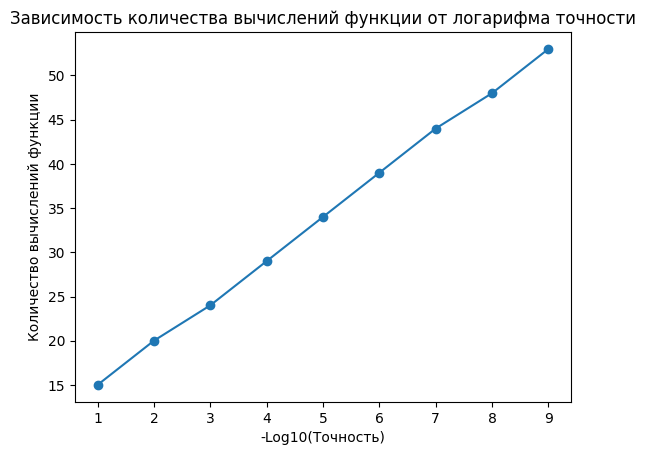

In [49]:
import time
import math
import matplotlib.pyplot as plt

def f(x):
    return math.exp(x)

def find_min_golden_section(start, end, tol):
    iterations = 0
    data = []  
    while end - start > tol:
        iterations += 1
        mid1 = start + (end - start) * 0.382
        mid2 = start + (end - start) * 0.618
        if f(mid1) > f(mid2):
            start = mid1
        else:
            end = mid2

        interval_length = end - start
        ratio = interval_length / (end - start)

        data.append([iterations, start, end, interval_length, ratio])

    return start, f(start), iterations, data

# Метод золотого сечения
tolerance = float(input("Введите точность для метода золотого сечения: "))
start_time = time.time()
result_golden_section = find_min_golden_section(0, 100, tolerance)
end_time = time.time()
exec_time = end_time - start_time

if isinstance(result_golden_section, tuple):
    min_x, min_f, iterations, table_data_golden_section = result_golden_section

    print("\nТаблица результатов для метода золотого сечения:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")
    for row in table_data_golden_section:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4]}")
    print(f"\nМетод золотого сечения: Минимальное значение функции - {min_f}, значение x - {min_x}, число итераций - {iterations}, время выполнения - {exec_time:.6f} секунд")
    min_f_list.append(min_f)
    min_x_list.append(min_x)
    iterations_list.append(iterations)
    exec_time_list.append(exec_time)

    tolerances = [10**(-i) for i in range(1, 10)]
    iterations_list1 = [find_min_golden_section(0, 100, tol)[2] for tol in tolerances]

    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list1, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()
else:
    iterations_golden_section = result_golden_section
    print(f"\nМетод золотого сечения: Точность - {tolerance}, число итераций - {iterations_golden_section}, время выполнения - {exec_time:.6f} секунд")




<b>Метод Фибоначчи</b>

In [43]:
def fibonacci_method(a, b, tol):
    fib_sequence = [1, 1]
    while fib_sequence[-1] < (b - a) / tol:
        fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])

    rho = 0.5 * (1.0 + math.sqrt(5.0))
    c = b - (b - a) / rho
    d = a + (b - a) / rho
    fc = f(c)
    fd = f(d)
    iterations = 0

    while abs(c - d) > tol:
        iterations += 1
        if fc < fd:
            b = d
            d = c
            c = b - (b - a) / rho
            fd = fc
            fc = f(c)
        else:
            a = c
            c = d
            d = a + (b - a) / rho
            fc = fd
            fd = f(d)

    xmin = 0.5 * (a + b)
    ymin = f(xmin)
    return ymin, xmin, iterations

start_time = time.time()
min_f, min_x, iterations = fibonacci_method(0, 100, 0.001)
end_time = time.time()
exec_time = end_time - start_time
print(f"Метод Фиббоначи: Минимальное значение функции - {min_f}, значение x - {min_x}, число итераций - {iterations}, время выполнения - {exec_time} секунд")
min_f_list.append(min_f)
min_x_list.append(min_x)
iterations_list.append(iterations)
exec_time_list.append(exec_time)

Метод Фиббоначи: Минимальное значение функции - 1.0020449054235308, значение x - 0.0020428174504223714, число итераций - 21, время выполнения - 0.0 секунд


<b>Метод Ньютона</b>

In [44]:
from scipy.optimize import minimize

def f(x):
    return math.exp(x)

# Newton's Method
def newtons_method():
    start_time = time.time()
    result = minimize(f, x0=50, bounds=[(0, 100)], method='L-BFGS-B')
    end_time = time.time()
    return result.fun, result.x, result.nfev, end_time - start_time

min_f, min_x, iterations, exec_time = newtons_method()
print(f"Метод Ньютона: Минимальное значение функции - {min_f}, значение x - {min_x}, число итераций - {iterations}, время выполнения - {exec_time} секунд")
min_f_list.append(min_f)
min_x_list.append(min_x)
iterations_list.append(iterations)
exec_time_list.append(exec_time)

Метод Ньютона: Минимальное значение функции - 1.0, значение x - [0.], число итераций - 4, время выполнения - 0.0015087127685546875 секунд


C:\Users\n0ves\AppData\Local\Temp\ipykernel_6668\1005224799.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.exp(x)


<b>Создание таблицы и экспорт в Excel</b>

In [45]:
import pandas as pd


df = pd.DataFrame({'Метод': ['Метод половинного деления', 'Метод золотого сечения', 'Метод Фибоначчи', 'Метод Ньютона'], 'Минимальное значение f(x)': min_f_list, 'Минимальное значение x': min_x_list, 'Число итераций': iterations_list, 'Время выполнения': exec_time_list})
df.to_excel('Таблица методов.xlsx', index=False)